# Comunicações e Processamento de Sinal (CPS)
## Semana 2 
## Introdução aos códigos de Linha

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#np.random.seed(0)
#mensagem = np.array([0,1,1,0,1,0,0,1,1])
mensagem = np.random.randint(0,2, 100)
#randint(low, high=None, size=None, dtype=int)
#Return random integers from `low` (inclusive) to `high` (exclusive).

In [3]:
mensagem

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1])

In [4]:
Tb = 10 # numero de pontos por cada bit
A = 2
Sinal0 = np.zeros(Tb)  # sinal para o 0
Sinal1 = A*np.ones(Tb) # sinal para o 1

In [49]:
sinal = np.zeros(len(mensagem)*Tb) # array onde vamos guardar o sinal a enviar
inicio = 0
fim = Tb
for i in mensagem:
    if i == 1:
        sinal[inicio:fim] = Sinal1
    else:
        sinal[inicio:fim] = Sinal0
    inicio = inicio + Tb
    fim = fim + Tb

In [50]:
#plt.plot(sinal)

In [51]:
sinal = np.zeros(len(mensagem)*Tb) # array onde vamos guardar o sinal a enviar
for i in range(len(mensagem)):
    if mensagem[i] == 1:
        sinal[i*Tb:(i+1)*Tb] = Sinal1
    #else:
    #    sinal[i*Tb:(i+1)*Tb] = Sinal0

In [52]:
#plt.plot(sinal)

In [5]:
indices = np.arange(len(mensagem))
indices[mensagem == 1]

array([ 1,  2,  3,  5,  9, 11, 13, 15, 17, 21, 25, 27, 29, 30, 33, 35, 37,
       38, 39, 41, 42, 45, 46, 50, 51, 52, 54, 56, 58, 61, 63, 64, 65, 67,
       70, 73, 77, 79, 81, 84, 86, 88, 89, 90, 91, 95, 97, 98, 99])

In [6]:
sinal = np.zeros(len(mensagem)*Tb) # array onde vamos guardar o sinal a enviar
indices = np.arange(len(mensagem))
#indices[mensagem == 1]
for i in indices[mensagem == 1]:
        sinal[i*Tb:(i+1)*Tb] = Sinal1

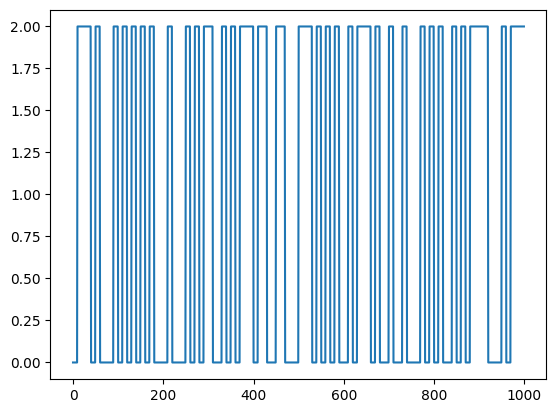

In [7]:
plt.plot(sinal)

In [11]:
sinal.shape

(1000,)

# Canal de Comunicação

## Gerar ruido que segue uma distribuição Gaussiana

In [27]:
ruido = 0.3*np.random.randn(len(sinal))

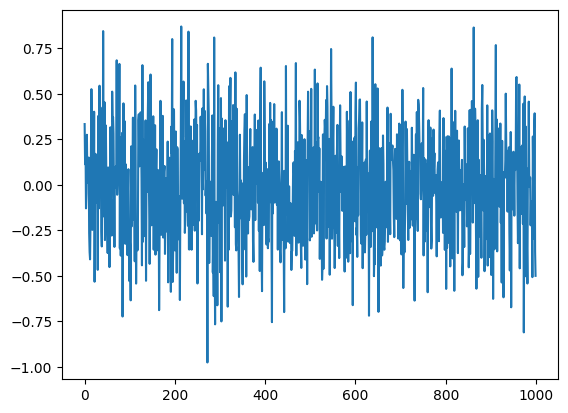

In [28]:
plt.plot(ruido)

In [29]:
np.mean(ruido)

-0.004159107572944537

In [30]:
np.std(ruido)

0.30289630300410075

plt.hist(ruido, bins = 50)

In [31]:
y = sinal + ruido

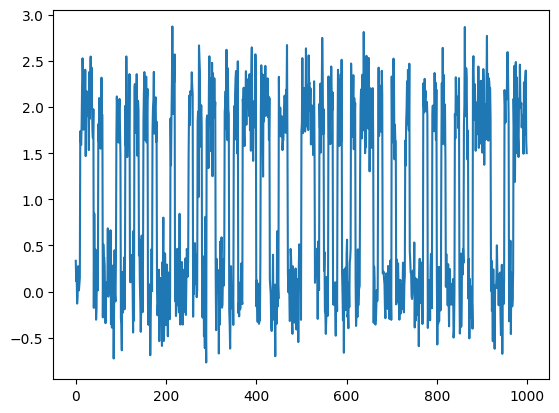

In [32]:
plt.plot(y)

# Emissor v0
## Fazer a média a cada Tb pontos

In [38]:
decisoes = np.zeros(len(mensagem))
for indice in range(0,len(y),Tb):
    print(indice)
    m = np.mean(y[indice:indice+Tb])
    print(m)
    if m > A/2:
        decisoes[int(indice/Tb)] = 1

0
0.10224381907217657
10
1.9532405983782144
20
1.9494357718690303
30
2.083993209125139
40
0.11564703922486716
50
1.8814227752403851
60
0.09339019017501908
70
0.16353380325592376
80
-0.033820321043575345
90
1.851792588186233
100
-0.08579702330269459
110
1.8958732232302595
120
0.1641760278322703
130
1.9932062510552355
140
0.11417148080490913
150
2.003950937302745
160
-0.0850379805655215
170
1.9435564260005926
180
-0.08572333598918641
190
0.036309666565448456
200
-0.05855038226570014
210
2.1211598807704517
220
0.013633077977288327
230
-0.03691675692701796
240
0.1584505851523887
250
2.056409371090591
260
0.15873760575617973
270
1.968883679002469
280
-0.15869194606675113
290
1.9333900329229678
300
1.965989098147535
310
-0.03382251816635282
320
0.22589683120599893
330
2.014853247681883
340
-0.16006432744227006
350
2.033550123210946
360
-0.06656953069550461
370
2.01486996456201
380
2.08352718124226
390
2.0177680200584382
400
-0.14918055507817546
410
2.015746607820577
420
2.0445898209930804
43

In [41]:
decisoes

array([0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
       0., 1., 0., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1.])